In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import missingno as msno
import torch
from torch import nn

In [2]:
os.getcwd()

'/workspaces/ds_project_1/notebooks'

In [3]:
sys.path.append("/workspaces/ds_project_1/data")

In [2]:
df = pd.read_csv("/workspaces/ds_project_1/data/sdwpf_2001_2112_full.csv", nrows=3000000)
turb_loc_df = pd.read_csv("/workspaces/ds_project_1/data/sdwpf_turb_location_elevation.csv")

In [4]:
df["Tmstamp"] = pd.to_datetime(df["Tmstamp"])
df.sort_values(by=["TurbID", "Tmstamp"], inplace=True)
df.set_index("Tmstamp", inplace=True)

In [5]:
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="10min")
print(date_range)
df = df.groupby("TurbID").apply(lambda x: x.reindex(date_range, method="bfill"))

DatetimeIndex(['2020-01-01 00:10:00', '2020-01-01 00:20:00',
               '2020-01-01 00:30:00', '2020-01-01 00:40:00',
               '2020-01-01 00:50:00', '2020-01-01 01:00:00',
               '2020-01-01 01:10:00', '2020-01-01 01:20:00',
               '2020-01-01 01:30:00', '2020-01-01 01:40:00',
               ...
               '2020-12-31 14:20:00', '2020-12-31 14:30:00',
               '2020-12-31 14:40:00', '2020-12-31 14:50:00',
               '2020-12-31 15:00:00', '2020-12-31 15:10:00',
               '2020-12-31 15:20:00', '2020-12-31 15:30:00',
               '2020-12-31 15:40:00', '2020-12-31 15:50:00'],
              dtype='datetime64[ns]', length=52655, freq='10min')


/tmp/ipykernel_59813/1863381831.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("TurbID").apply(lambda x: x.reindex(date_range, method="bfill"))


In [7]:
df

TurbID   Wspd  Wdir   Etmp   Itmp    Ndir   Pab1  \
TurbID                                                                         
1      2020-01-01 00:10:00       1    NaN   NaN    NaN    NaN     NaN    NaN   
       2020-01-01 00:20:00       1    NaN   NaN    NaN    NaN     NaN    NaN   
       2020-01-01 00:30:00       1    NaN   NaN    NaN    NaN     NaN    NaN   
       2020-01-01 00:40:00       1    NaN   NaN    NaN    NaN     NaN    NaN   
       2020-01-01 00:50:00       1    NaN   NaN    NaN    NaN     NaN    NaN   
...                            ...    ...   ...    ...    ...     ...    ...   
134    2020-12-31 15:10:00     134  8.125   1.8 -0.105  4.135  216.51  3.025   
       2020-12-31 15:20:00     134  8.125   1.8 -0.105  4.135  216.51  3.025   
       2020-12-31 15:30:00     134  8.460   0.8 -0.140  4.320  216.51  0.020   
       2020-12-31 15:40:00     134  8.460   0.8 -0.140  4.320  216.51  0.020   
       2020-12-31 15:50:00     134  8.460   0.8 -0.140  4.320  216.51  0.020   

                             Pab2   Pab3    Prtv      T2m        Sp     RelH  \
TurbID                                                                         
1      2020-01-01 00:10:00    NaN    NaN     NaN      NaN       NaN      NaN   
       2020-01-01 00:20:00    NaN    NaN     NaN      NaN       NaN      NaN   
       2020-01-01 00:30:00    NaN    NaN     NaN      NaN       NaN      NaN   
       2020-01-01 00:40:00    NaN    NaN     NaN      NaN       NaN      NaN   
       2020-01-01 00:50:00    NaN    NaN     NaN      NaN       NaN      NaN   
...                           ...    ...     ...      ...       ...      ...   
134    2020-12-31 15:10:00  3.025  3.025 -84.905 -5.20224  86170.11  0.38691   
       2020-12-31 15:20:00  3.025  3.025 -84.905 -5.20224  86170.11  0.38691   
       2020-12-31 15:30:00  0.020  0.020 -58.120 -5.20224  86170.11  0.38691   
       2020-12-31 15:40:00  0.020  0.020 -58.120 -5.20224  86170.11  0.38691   
       2020-12-31 15:50:00  0.020  0.020 -58.120 -5.20224  86170.11  0.38691   

                              Wspd_w      Wdir_w   Tp      Patv  
TurbID                                                           
1      2020-01-01 00:10:00       NaN         NaN  NaN       NaN  
       2020-01-01 00:20:00       NaN         NaN  NaN       NaN  
       2020-01-01 00:30:00       NaN         NaN  NaN       NaN  
       2020-01-01 00:40:00       NaN         NaN  NaN       NaN  
       2020-01-01 00:50:00       NaN         NaN  NaN       NaN  
...                              ...         ...  ...       ...  
134    2020-12-31 15:10:00  7.535276  269.002269  0.0   851.165  
       2020-12-31 15:20:00  7.535276  269.002269  0.0   851.165  
       2020-12-31 15:30:00  7.535276  269.002269  0.0  1100.890  
       2020-12-31 15:40:00  7.535276  269.002269  0.0  1100.890  
       2020-12-31 15:50:00  7.535276  269.002269  0.0  1100.890  

[7055770 rows x 17 columns]

In [6]:
df.head()

TurbID  Wspd  Wdir  Etmp  Itmp  Ndir  Pab1  Pab2  \
TurbID                                                                         
1      2020-01-01 00:10:00       1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       2020-01-01 00:20:00       1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       2020-01-01 00:30:00       1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       2020-01-01 00:40:00       1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
       2020-01-01 00:50:00       1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                            Pab3  Prtv  T2m  Sp  RelH  Wspd_w  Wdir_w  Tp  \
TurbID                                                                      
1      2020-01-01 00:10:00   NaN   NaN  NaN NaN   NaN     NaN     NaN NaN   
       2020-01-01 00:20:00   NaN   NaN  NaN NaN   NaN     NaN     NaN NaN   
       2020-01-01 00:30:00   NaN   NaN  NaN NaN   NaN     NaN     NaN NaN   
       2020-01-01 00:40:00   NaN   NaN  NaN NaN   NaN     NaN     NaN NaN   
       2020-01-01 00:50:00   NaN   NaN  NaN NaN   NaN     NaN     NaN NaN   

                            Patv  
TurbID                            
1      2020-01-01 00:10:00   NaN  
       2020-01-01 00:20:00   NaN  
       2020-01-01 00:30:00   NaN  
       2020-01-01 00:40:00   NaN  
       2020-01-01 00:50:00   NaN

In [8]:
df.reset_index(level="TurbID", drop=True, inplace=True)

In [9]:
df

,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,T2m,Sp,RelH,Wspd_w,Wdir_w,Tp,Patv
2020-01-01 00:10:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:30:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:40:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:50:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 15:10:00,134,8.125,1.8,-0.105,4.135,216.51,3.025,3.025,3.025,-84.905,-5.20224,86170.11,0.38691,7.535276,269.002269,0.0,851.165
2020-12-31 15:20:00,134,8.125,1.8,-0.105,4.135,216.51,3.025,3.025,3.025,-84.905,-5.20224,86170.11,0.38691,7.535276,269.002269,0.0,851.165
2020-12-31 15:30:00,134,8.460,0.8,-0.140,4.320,216.51,0.020,0.020,0.020,-58.120,-5.20224,86170.11,0.38691,7.535276,269.002269,0.0,1100.890
2020-12-31 15:40:00,134,8.460,0.8,-0.140,4.320,216.51,0.020,0.020,0.020,-58.120,-5.20224,86170.11,0.38691,7.535276,269.002269,0.0,1100.890


In [ ]:
df[df.index==pd.Timestamp("2020-01-03 04:25:00")]

,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,T2m,Sp,RelH,Wspd_w,Wdir_w,Tp,Patv


In [13]:
turb_loc_df.head()

,TurbID,x,y,Ele
0,1,3349.8515,5939.23193,1430.700073
1,2,3351.0017,6416.64673,1434.200073
2,3,3314.7797,6892.18395,1436.900024
3,4,3352.0940,7366.14203,1439.700073
4,5,3355.3420,7841.20175,1441.700073


In [14]:
df.describe(include=(np.number))

,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,T2m,Sp,RelH,Wspd_w,Wdir_w,Tp,Patv
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,50.907744,5.040547,0.692094,60.547239,25.593505,189.434555,26.074230,26.059811,26.055975,-12.336867,8.920613,85436.910893,0.343464,4.767444,159.591420,0.000004,363.540509
std,10.261738,3.349727,30.211210,119.772510,17.160553,160.429739,38.521258,38.513623,38.514248,69.588362,13.960841,631.646360,0.189423,2.359204,107.124905,0.000037,419.669006
min,22.000000,0.000000,-190.020000,-272.845000,-273.170000,-506.600000,-10.000000,-1.990000,-4.695000,-559.820000,-20.709045,84010.670000,0.038873,0.131054,0.026170,0.000000,-6.220000
25%,42.000000,2.275000,-3.050000,7.665000,17.100000,68.180000,0.015000,0.015000,0.015000,-37.950000,-3.115021,84918.836000,0.190918,3.106509,69.521917,0.000000,0.000000
50%,51.000000,4.395000,-0.255000,21.080000,26.235000,192.040000,0.790000,0.785000,0.785000,-0.300000,9.858795,85423.086000,0.301920,4.340788,109.130275,0.000000,202.222500
75%,60.000000,6.980000,2.560000,32.360000,35.590000,321.136250,85.980000,85.980000,85.980000,0.000000,21.027191,85923.470000,0.467397,6.222736,263.962006,0.000000,572.241250
max,68.000000,23.965000,405.765000,394.040000,183.290000,700.620000,99.980000,99.980000,90.980000,399.510000,34.947662,87042.510000,0.984610,12.858649,359.984472,0.001532,1560.210000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def create_plots_matrix(df, features_subset, turbines_subset, ncols, figsize):
    df_subset = df[df["TurbID"].isin(turbines_subset)].copy()

    nrows = int(np.ceil(len(features_subset) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True)

    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
    plt.style.use("ggplot")

    # colors list with colormaps
    colors = plt.cm.viridis(np.linspace(0, 1, len(turbines_subset)))  # Distinct colors

    for axe, feature in zip(axes, features_subset):
        for turbine, color in zip(turbines_subset, colors):
            filtered_df = df_subset[df_subset["TurbID"] == turbine].sort_values("Tmstamp")

            # Use a thicker line, transparency, and different colors
            axe.plot(
                filtered_df.index, filtered_df[feature],
                label=f"Turbine {turbine}", color=color, linewidth=1.5, alpha=0.7
            )

        axe.set_title(f"Feature: {feature}", fontsize=12, fontweight="bold")
        axe.tick_params(axis='x', rotation=45, labelsize=10)
        axe.tick_params(axis='y', labelsize=10)

        # Format x-axis as readable dates
        axe.xaxis.set_major_locator(mdates.AutoDateLocator())
        axe.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    # Hide unused subplots
    for ax in axes[len(features_subset):]:
        ax.set_visible(False)

    fig.suptitle("Area Chart Matrix for Selected Features", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()


In [65]:
def add_rolling_avrg(df, feature, window):
    df[feature+"_ra"] = df[feature].rolling(window).mean()
    return df

In [ ]:
col = df.columns.to_list()
col.remove("TurbID")

In [45]:
int(len(col)/2)

8

[[0.267004 0.004874 0.329415 1.      ]
 [0.253935 0.265254 0.529983 1.      ]
 [0.163625 0.471133 0.558148 1.      ]
 [0.134692 0.658636 0.517649 1.      ]
 [0.477504 0.821444 0.318195 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


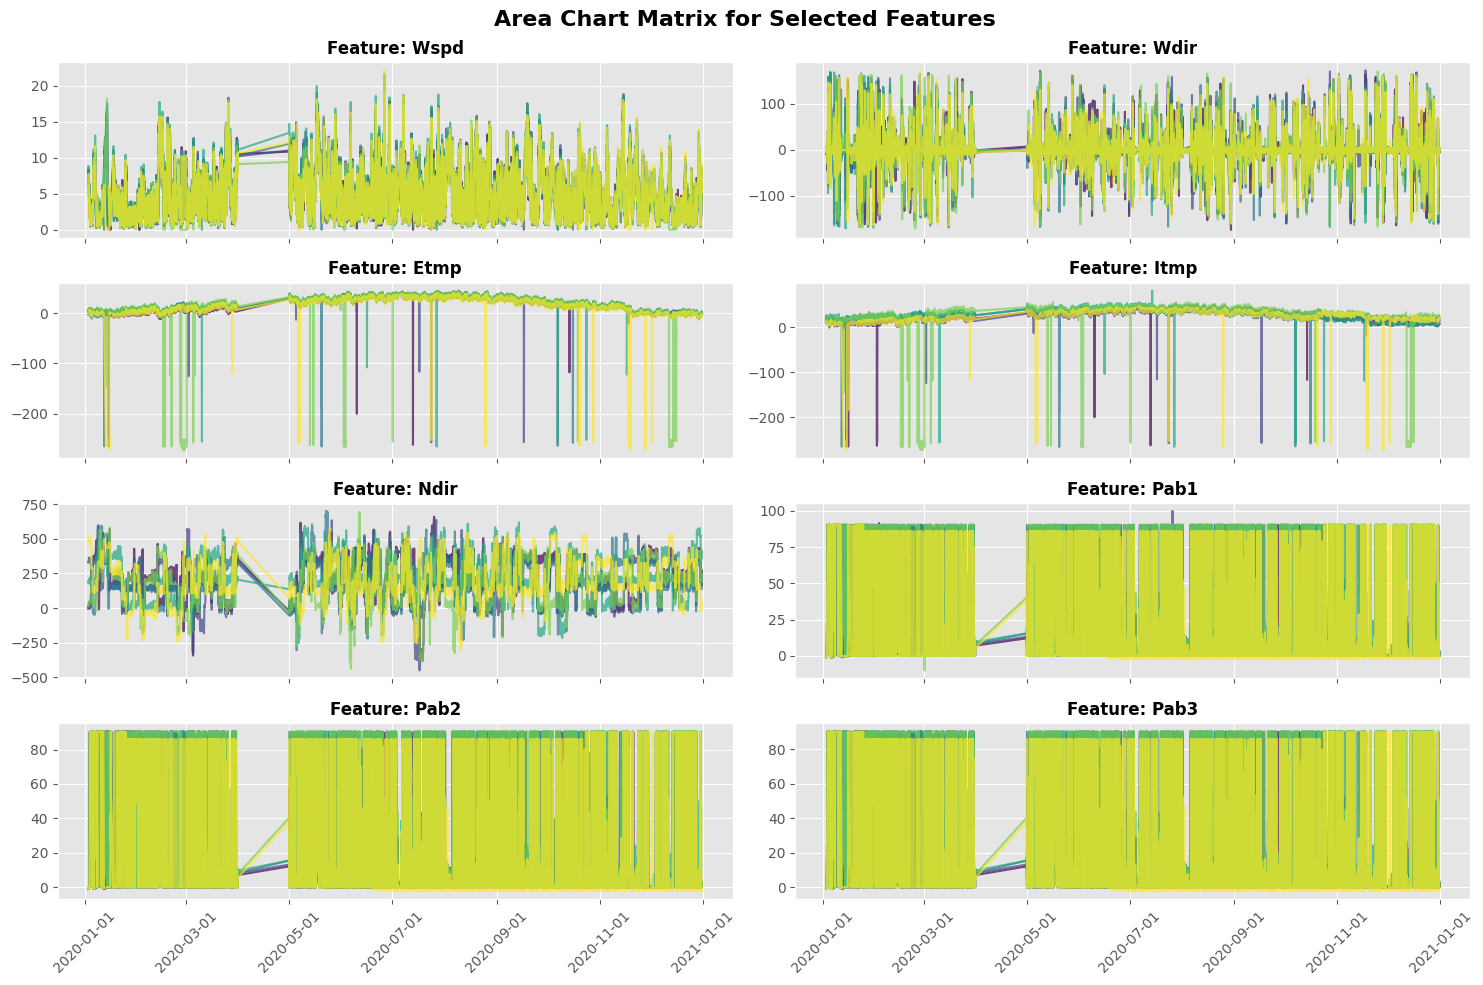

In [55]:
create_plots_matrix(df, col[:int(len(col)/2)], df["TurbID"].unique()[:6], 2, (15, 10))

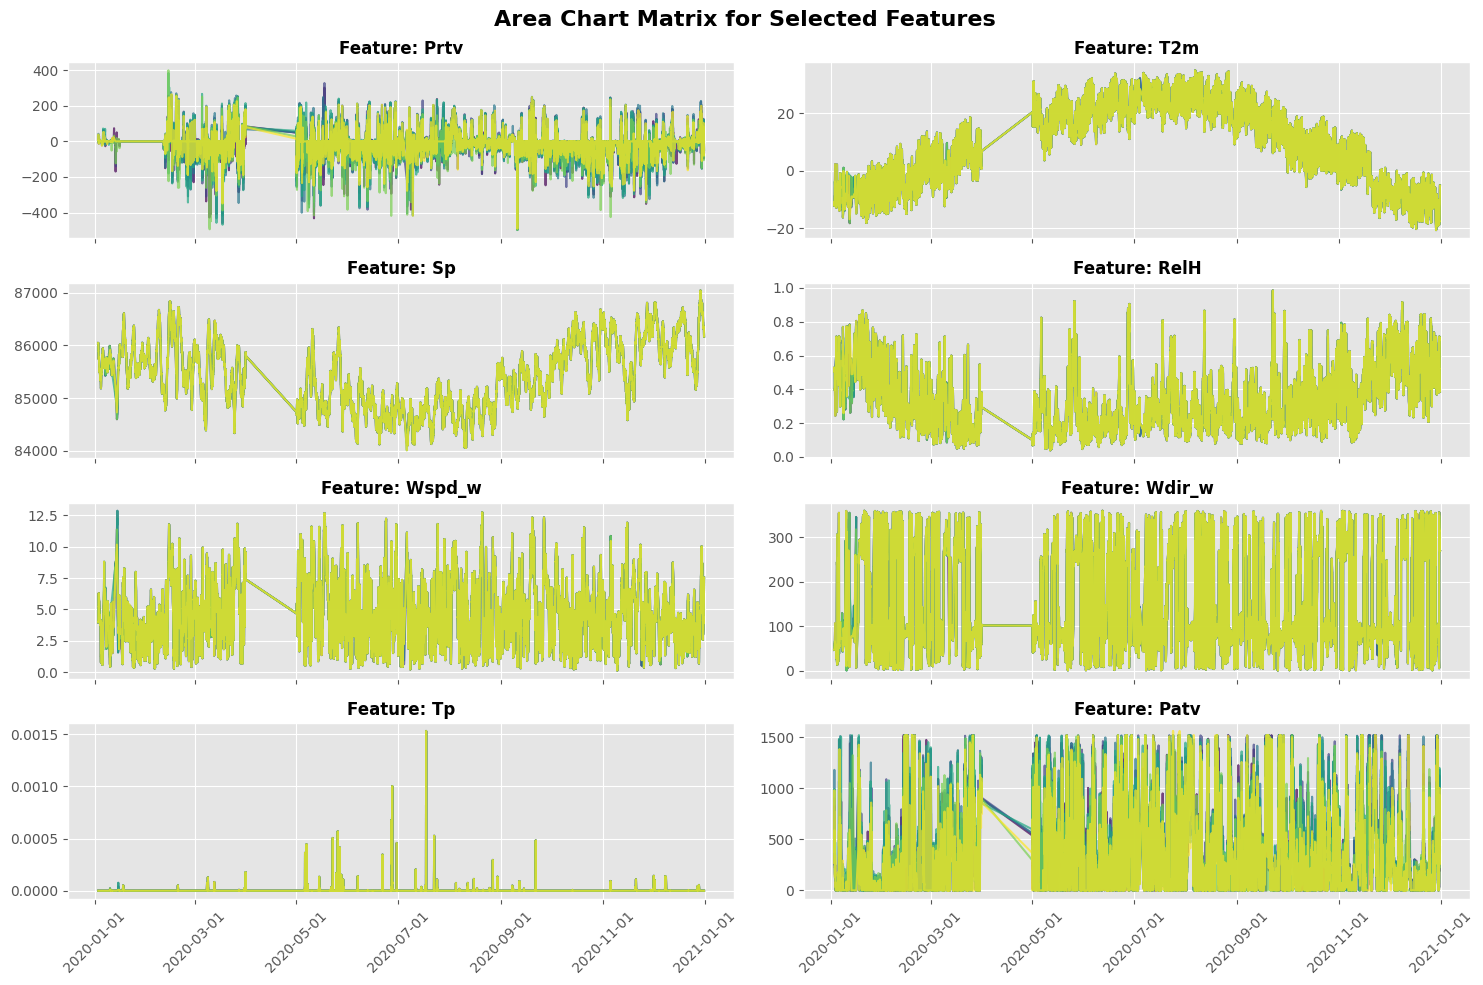

In [53]:
create_plots_matrix(df, col[int(len(col)/2):], df["TurbID"].unique()[:6], 2, (15, 10))

In [104]:
print(df.index.freq)

None


In [109]:
def plot_multiple_ts(df, feature, turbines_subset, figsize, window=None):
    df_subset = df[df["TurbID"].isin(turbines_subset)].copy()

    fig = plt.figure(figsize=figsize)
    plt.style.use("ggplot")
    cm = plt.cm.viridis(np.linspace(0, 1, len(turbines_subset)))
    if window:
        df_subset[feature+"_ra"] = df_subset[feature].rolling(window=window).mean()

    for turbine, color in zip(turbines_subset, cm):

        filtered_df = df_subset[df_subset["TurbID"]==turbine]

        plt.plot(filtered_df.index, 
                 filtered_df[feature+"_ra"] if window else filtered_df[feature],
                 color=color,
                 linewidth=1.5,
                 alpha=0.7)
    plt.tight_layout()
    plt.show()

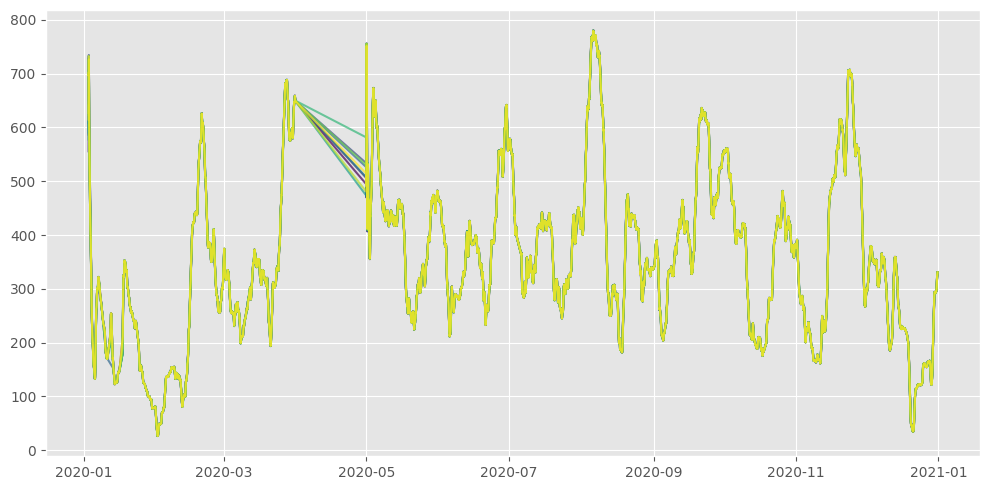

In [110]:
plot_multiple_ts(df, "Patv", df["TurbID"].unique()[:10], (10, 5), "7D")

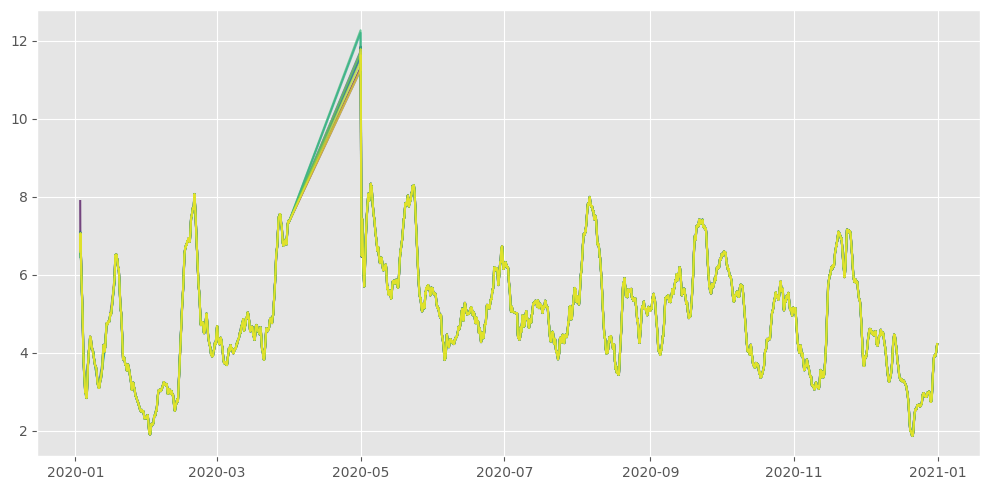

In [107]:
plot_multiple_ts(df, "Wspd", df["TurbID"].unique()[:10], (10, 5), "7D")

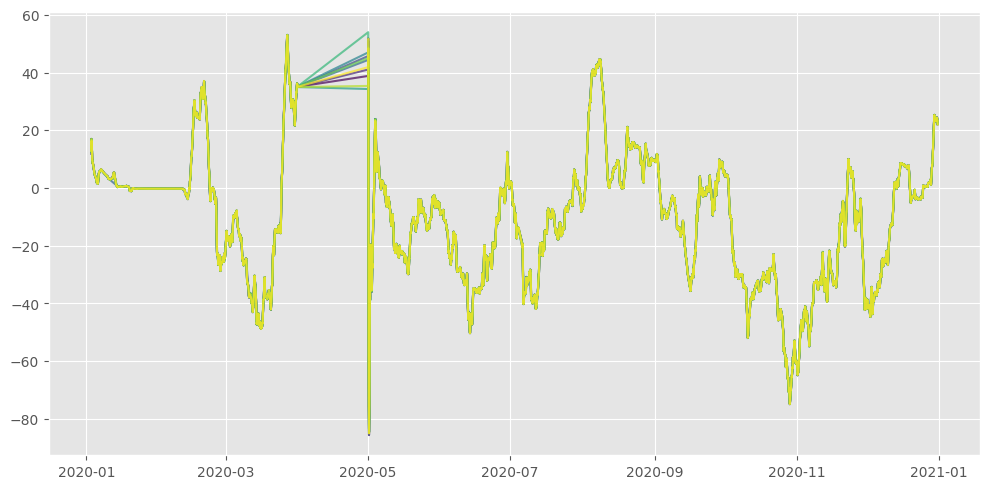

In [117]:
plot_multiple_ts(df, "Prtv", df["TurbID"].unique()[:10], (10, 5), "7D")

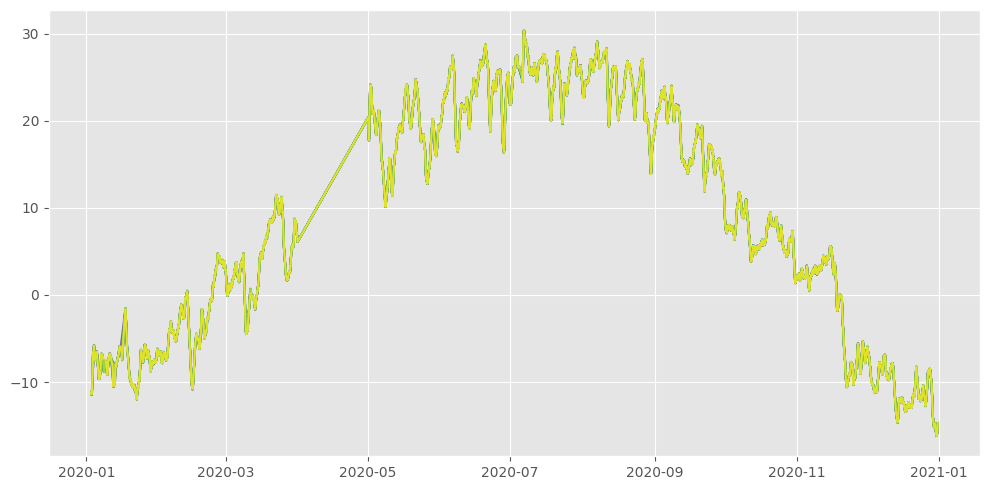

In [120]:
plot_multiple_ts(df, "T2m", df["TurbID"].unique()[:10], (10, 5), "1D")

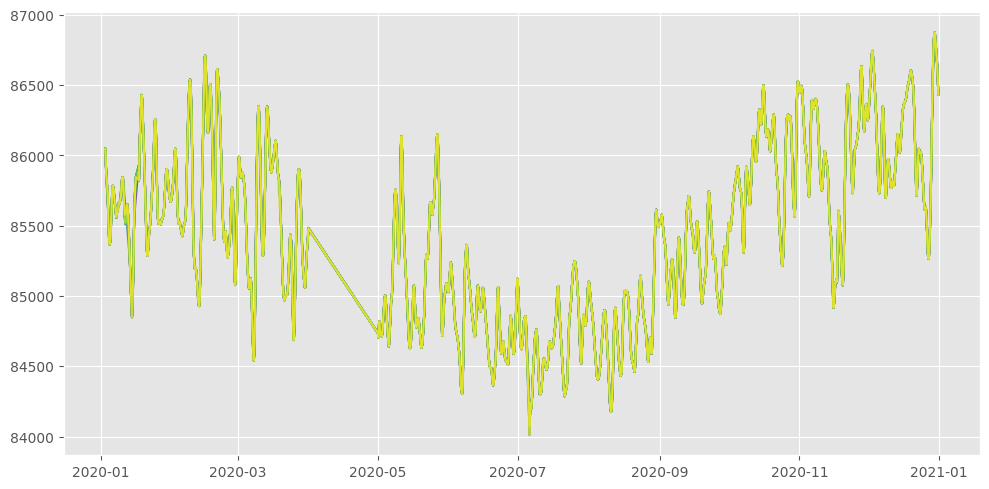

In [125]:
plot_multiple_ts(df, "Sp", df["TurbID"].unique()[:10], (10, 5), "1D")

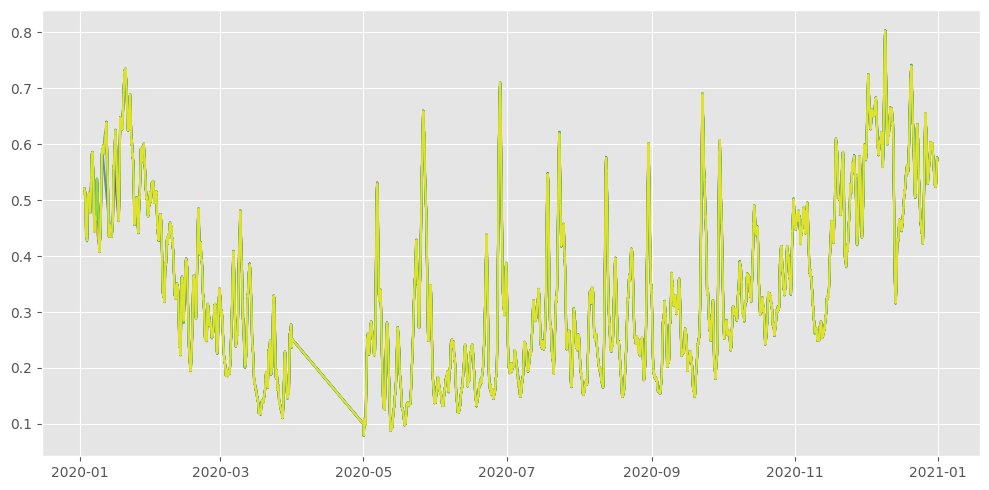

In [126]:
plot_multiple_ts(df, "RelH", df["TurbID"].unique()[:10], (10, 5), "1D")

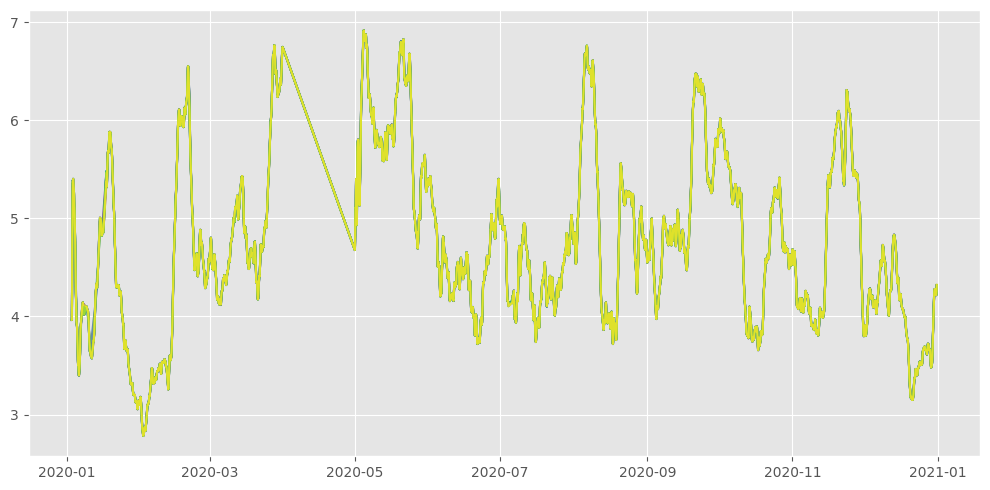

In [128]:
plot_multiple_ts(df, "Wspd_w", df["TurbID"].unique()[:10], (10, 5), "7D")

In [7]:
predictors = [col for col in df.columns.to_list() if col not in ["Patv", "TurbID"]]
print(predictors)

['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'T2m', 'Sp', 'RelH', 'Wspd_w', 'Wdir_w', 'Tp']


In [8]:
timesteps_per_turbine = df.groupby("TurbID").size()
print(timesteps_per_turbine.value_counts())

52655    134
Name: count, dtype: int64


In [13]:
index_drop = [id for id in df["TurbID"].unique() if len(df[df["TurbID"]==id]) != 32224]
print(index_drop)

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), 

In [9]:
df = df[~df["TurbID"].isin(index_drop)]

In [10]:
df.head()

,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,T2m,Sp,RelH,Wspd_w,Wdir_w,Tp,Patv
Tmstamp,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:10:00,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:10:00,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:10:00,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:10:00,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for _, group in df.groupby("TurbID"):
    print(group)

                     TurbID  Wspd   Wdir   Etmp   Itmp    Ndir  Pab1  Pab2  \
2020-01-01 00:10:00       1   NaN    NaN    NaN    NaN     NaN   NaN   NaN   
2020-01-01 00:20:00       1   NaN    NaN    NaN    NaN     NaN   NaN   NaN   
2020-01-01 00:30:00       1   NaN    NaN    NaN    NaN     NaN   NaN   NaN   
2020-01-01 00:40:00       1   NaN    NaN    NaN    NaN     NaN   NaN   NaN   
2020-01-01 00:50:00       1   NaN    NaN    NaN    NaN     NaN   NaN   NaN   
...                     ...   ...    ...    ...    ...     ...   ...   ...   
2020-12-31 15:10:00       1  4.32 -3.165  1.635  23.29  252.34 -0.22 -0.22   
2020-12-31 15:20:00       1  4.32 -3.165  1.635  23.29  252.34 -0.22 -0.22   
2020-12-31 15:30:00       1  4.10 -8.040  2.140  24.16  252.34 -0.78 -0.78   
2020-12-31 15:40:00       1  4.10 -8.040  2.140  24.16  252.34 -0.78 -0.78   
2020-12-31 15:50:00       1  4.10 -8.040  2.140  24.16  252.34 -0.78 -0.78   

                     Pab3    Prtv      T2m        Sp     RelH  

In [9]:
for col in df.columns:
    print(df[col].first_valid_index())

2020-01-01 00:10:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-01 08:00:00
2020-01-01 08:00:00
2020-01-01 08:00:00
2020-01-01 08:00:00
2020-01-01 08:00:00
2020-01-01 08:00:00
2020-01-03 00:00:00


In [10]:
for col in df.columns:
    df.fillna({col: df[col].mean()}, inplace=True)

In [12]:
# Drop start of the dataframe:
df = df[~(df.index<pd.to_datetime("2020-01-03 00:00:00"))]

In [13]:
for _, group in df.groupby("TurbID"):
    print(group)

                     TurbID    Wspd   Wdir   Etmp   Itmp    Ndir   Pab1  \
2020-01-03 00:00:00       1  10.440 -0.450  2.050  19.81  375.16  1.010   
2020-01-03 00:10:00       1  10.440 -0.450  2.050  19.81  375.16  1.010   
2020-01-03 00:20:00       1  10.440 -0.450  2.050  19.81  375.16  1.010   
2020-01-03 00:30:00       1   9.755 -1.930  1.890  19.71  375.16  1.005   
2020-01-03 00:40:00       1   9.755 -1.930  1.890  19.71  375.16  1.005   
...                     ...     ...    ...    ...    ...     ...    ...   
2020-12-31 15:10:00       1   4.320 -3.165  1.635  23.29  252.34 -0.220   
2020-12-31 15:20:00       1   4.320 -3.165  1.635  23.29  252.34 -0.220   
2020-12-31 15:30:00       1   4.100 -8.040  2.140  24.16  252.34 -0.780   
2020-12-31 15:40:00       1   4.100 -8.040  2.140  24.16  252.34 -0.780   
2020-12-31 15:50:00       1   4.100 -8.040  2.140  24.16  252.34 -0.780   

                      Pab2   Pab3    Prtv        T2m         Sp      RelH  \
2020-01-03 00:00:00  1

In [12]:
for col in df.columns:
    print(df[col].first_valid_index())

2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00
2020-01-03 00:00:00


In [18]:
plot_multiple_ts(df, "Patv", df["TurbID"].unique(), (10, 5), "7D")

NameError: name 'plot_multiple_ts' is not defined

In [13]:
df.groupby("TurbID").size().value_counts()

52368    134
Name: count, dtype: int64

In [25]:
df.shape[0]

7017312

In [26]:
len(df)

7017312

In [30]:
df.drop(columns=["Patv"]).iloc[0:int(len(df)*0.9)]

,TurbID,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,T2m,Sp,RelH,Wspd_w,Wdir_w,Tp
2020-01-03 00:00:00,1,10.440,-0.450,2.05,19.810,375.16,1.010,1.010,1.010,9.100,-10.331543,86082.164,0.506401,3.526873,44.446450,0.0
2020-01-03 00:10:00,1,10.440,-0.450,2.05,19.810,375.16,1.010,1.010,1.010,9.100,-10.331543,86082.164,0.506401,3.526873,44.446450,0.0
2020-01-03 00:20:00,1,10.440,-0.450,2.05,19.810,375.16,1.010,1.010,1.010,9.100,-10.331543,86082.164,0.506401,3.526873,44.446450,0.0
2020-01-03 00:30:00,1,9.755,-1.930,1.89,19.710,375.16,1.005,1.005,1.005,2.920,-10.331543,86082.164,0.506401,3.526873,44.446450,0.0
2020-01-03 00:40:00,1,9.755,-1.930,1.89,19.710,375.16,1.005,1.005,1.005,2.920,-10.331543,86082.164,0.506401,3.526873,44.446450,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-08 03:50:00,121,4.030,-28.880,394.33,37.190,316.18,38.570,38.575,38.575,5.005,20.701569,84774.860,0.332838,3.122297,356.067298,0.0
2020-08-08 04:00:00,121,2.400,10.545,394.33,37.145,284.20,35.905,35.900,35.905,5.020,19.641998,84779.590,0.322236,2.393325,359.459724,0.0
2020-08-08 04:10:00,121,2.400,10.545,394.33,37.145,284.20,35.905,35.900,35.905,5.020,19.641998,84779.590,0.322236,2.393325,359.459724,0.0
2020-08-08 04:20:00,121,2.400,10.545,394.33,37.145,284.20,35.905,35.900,35.905,5.020,19.641998,84779.590,0.322236,2.393325,359.459724,0.0


In [14]:
df_predictor = df[predictors]

In [ ]:
df_predictor = df_predictor.values.reshape(len(df["TurbID"].unique()), -1, df_predictor.shape[-1])

In [16]:
df_predictor.shape

(134, 52368, 15)

In [17]:
data_tensor = torch.tensor(df_predictor, dtype=torch.float)
display(data_tensor.shape)

torch.Size([134, 52368, 15])

In [21]:
df["Patv"]

2020-01-03 00:00:00    1503.050
2020-01-03 00:10:00    1503.050
2020-01-03 00:20:00    1503.050
2020-01-03 00:30:00    1336.245
2020-01-03 00:40:00    1336.245
                         ...   
2020-12-31 15:10:00     851.165
2020-12-31 15:20:00     851.165
2020-12-31 15:30:00    1100.890
2020-12-31 15:40:00    1100.890
2020-12-31 15:50:00    1100.890
Name: Patv, Length: 7017312, dtype: float64

In [22]:
target_tensor = torch.tensor(df["Patv"].values, dtype=torch.float)

In [23]:
target_tensor.shape

torch.Size([7017312])

In [19]:
class MovingAvg(nn.Module):
    def __init__(self, 
                 kernel_size,
                 stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.averaging = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # Shape : [Batch dim, seq len, channels]
        # x[:, 0, :] would remove first dim
        if len(x.shape) == 2:
            x = x.unsqueeze(0)
        
        #Repeated padding to avoid edge effects during mean computation
        front_val = x[:, 0:1, :].repeat(1, (self.kernel_size-1)//2, 1)
        end_val = x[:, -1:, :]
        x = torch.concat([front_val, x, end_val], dim=1)
        # AvgPool1d work with (N: batch size, C: Channels, L: len of signal seq)
        x = self.averaging(x.permute((0, 2, 1)))
        # We need to repermute to (batch size, seq len, channels)
        x = x.permute(0, 2, 1)
        return x

class TsDecomposition(nn.Module):
    def __init__(self, kernel_size,
                 stride):
        super().__init__()
        self.moving_avg = MovingAvg(kernel_size=kernel_size, stride=stride)
    
    def forward(self, x):
        mvg_avg = self.moving_avg(x)
        residuals = x - mvg_avg
        return mvg_avg, residuals
    
class Dlinear(nn.Module):
    def __init__(self, n_features, seq_len, fcst_len, kernel_size, stride):
        super().__init__()
        self.ts_decomp = TsDecomposition(kernel_size=kernel_size, stride=stride)
        self.seq_len = seq_len
        self.fcst_len = fcst_len
        self.n_features = n_features

        self.LinearTrend = nn.ModuleList()
        self.LinearSeasonal = nn.ModuleList()

        for channel in range(self.n_features):
            self.LinearTrend.append(nn.Linear(seq_len, fcst_len))
            self.LinearTrend[channel].weight = nn.Parameter((1/self.seq_len) * torch.randn([self.seq_len, self.fcst_len]))
            self.LinearSeasonal.append(nn.Linear(seq_len, fcst_len))
            self.LinearSeasonal[channel].weight = nn.Parameter((1/self.seq_len) * torch.randn([self.seq_len, self.fcst_len]))

        self.LinearPred = nn.Linear(self.n_features, 1)
        self.LinearPred.weight = nn.Parameter((1/self.seq_len) * torch.randn([self.n_features, 1]))
    
    def forward(self, x):
        trend_comp, seasonal_comp = self.ts_decomp(x)
        trend_comp, seasonal_comp = trend_comp.permute(0, 2, 1), seasonal_comp.permute(0, 2, 1)

        # Initializing output tensors
        trend_output = torch.zeros([trend_comp.shape[0], self.n_features, self.fcst_len], dtype=trend_comp.dtype)
        seasonal_output = torch.zeros([seasonal_comp.shape[0], self.n_features, self.fcst_len], dtype=trend_comp.dtype)

        for i in range(self.n_features):
            trend_output[:, i, :] = self.LinearTrend(trend_comp[:, i, :])
            seasonal_output[:, i, :] = self.LinearSeasonal(seasonal_comp[:, i, :])


In [2]:
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler

class DatasetCustom(Dataset):
    def __init__(self, seq_len: int, pred_len:int, run_type: str):
        super().__init__()
        self.seq_len = seq_len
        self.pred_len = pred_len
        map_run_type = {"train": 0, "val": 1, "test": 2}
        self.run_type = map_run_type[run_type]
        print(self.run_type)
        self.__load_data__()

    def __load_data__(self):
        df = pd.read_csv("/workspaces/ds_project_1/data/sdwpf_2001_2112_full.csv", nrows=3000000)

        # set index, sort values
        df["Tmstamp"] = pd.to_datetime(df["Tmstamp"])
        df.sort_values(by=["TurbID", "Tmstamp"], inplace=True)
        df.set_index("Tmstamp", inplace=True)

        # Reindex all turbines for same length
        date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="10min")
        df = df.groupby("TurbID").apply(lambda x: x.reindex(date_range, method="bfill"))
        df.reset_index(level="TurbID", drop=True, inplace=True) #Drop multiple index

        # Drop values before first valid index
        df = df[~(df.index<pd.to_datetime("2020-01-03 00:00:00"))]
        # Rearrange columns with target at the end
        new_cols = [col for col in df.columns.to_list() if col not in ["Patv"]]
        new_cols.append("Patv")
        df = df.reindex(columns=new_cols)

        train_end_index = int(np.ceil(len(df)*0.9)) #End of the train split

        # Split each turbines dataset separately to avoid data leakage
        if self.run_type == 0:
            turbine_groups = df.groupby("TurbID")
            dfs = []
            for _, group in turbine_groups:
                train_end_index = int(np.ceil(len(group)*0.9))
                if self.run_type == 0:
                    dfs.append(group.iloc[:train_end_index])
                else:
                    dfs.append(group.iloc[train_end_index:])

            df = pd.concat(dfs)

        # Scaling
        if self.run_type == 0:
            self.scaler = StandardScaler()
            # Fit on train data to prevent data leakage
            self.scaler.fit(df.drop(columns=["TurbID"]).values)
            scaled_data = self.scaler.transform(df.drop(columns=["TurbID"]).values)
        else: # if validation run
            scaled_data = self.scaler.transform(df.drop(columns=["TurbID"]).values)

        # num_features = df.drop(columns=["TurbID"]).shape[-1]

        self.predictors = scaled_data.reshape(len(df["TurbID"].unique()), -1, scaled_data.shape[-1])
        print(self.predictors)
        self.target = scaled_data.reshape(len(df["TurbID"].unique()), -1, scaled_data.shape[-1])

    def __getitem__(self, index):
        turbine = index // (self.predictors.shape[1] - self.seq_len - self.pred_len + 1) # index turbine // total number of sliding window per turbines
        seq_start = index % (self.predictors.shape[1] - self.seq_len - self.pred_len + 1) # index mod total number of sliding window 

        target_start = seq_start + self.seq_len
        target_end = target_start + self.pred_len

        preds_seq = self.predictors[turbine][seq_start:seq_start+self.seq_len]
        target_seq = self.target[turbine][target_start:target_end]

        return preds_seq, target_seq
    
    def __len__(self):
        # Total number of samples is (number of turbines) * (number of time steps - sliding window length - prediction horizon)
        # We have to substract sliding window length and prediction horizon, so the last index used has a start for the sliding window
        # is considering the length of sliding window and the pred horizon.
        # Hence the second term is the possible number of sliding window per turbine.
        total_samples = self.predictors.shape[0] * (self.predictors.shape[1] - self.seq_len - self.pred_len + 1)
        return total_samples

In [ ]:
dataset = DatasetCustom(50, 72, "train")

for i, (batch_x, batch_y) in enumerate(dataset):
    print(i)
    print(batch_y)
    print(batch_x)